In [7]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from tqdm import tqdm
import cv2
import skvideo.io



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns



In [8]:
# import pandas as pd

# Assuming 'file_paths' is a dictionary with keys as names and values as file paths
file_paths = {
    '11': '/Users/julianna/Desktop/kinematic_df/11.csv',
    '12': '/Users/julianna/Desktop/kinematic_df/12.csv',
    '13': '/Users/julianna/Desktop/kinematic_df/13.csv',
    '14': '/Users/julianna/Desktop/kinematic_df/14.csv',
    '15': '/Users/julianna/Desktop/kinematic_df/15.csv',
    '19': '/Users/julianna/Desktop/kinematic_df/19.csv',
    '21': '/Users/julianna/Desktop/kinematic_df/21.csv',
    '22': '/Users/julianna/Desktop/kinematic_df/22.csv',
    '23': '/Users/julianna/Desktop/kinematic_df/23.csv',
    '24': '/Users/julianna/Desktop/kinematic_df/24.csv',
    '29': '/Users/julianna/Desktop/kinematic_df/29.csv',
    '30': '/Users/julianna/Desktop/kinematic_df/30.csv',
    '35': '/Users/julianna/Desktop/kinematic_df/35.csv',
    '36': '/Users/julianna/Desktop/kinematic_df/36.csv',
    '38': '/Users/julianna/Desktop/kinematic_df/38.csv',
    '47': '/Users/julianna/Desktop/kinematic_df/47.csv',
    '52': '/Users/julianna/Desktop/kinematic_df/52.csv',
    '54': '/Users/julianna/Desktop/kinematic_df/54.csv',
    '60': '/Users/julianna/Desktop/kinematic_df/60.csv',
    '82': '/Users/julianna/Desktop/kinematic_df/82.csv'
}

# Initialize an empty dictionary to hold your DataFrames
kinematic_dataframes = {}

# Loop over the file_paths dictionary and read each CSV file into a DataFrame
for name, file_path in file_paths.items():
    kinematic_dataframes[name] = pd.read_csv(file_path)

# Now 'kinematic_dataframes' is a dictionary with keys as names and values as DataFrames


In [3]:
# Assuming 'file_paths' is a dictionary with keys as names and values as file paths
file_paths =  {'11': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc24.csv',
 '29': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc35.csv',
 '36': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc36.csv',
 '38': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc38.csv',
 '47': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc47.csv',
 '52': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc52.csv',
 '54': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc54.csv',
 '60': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc60.csv',
 '82': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/complex_ALH_calc82.csv'}

# Initialize an empty dictionary to hold your DataFrames
complex_ALH_calc = {}

# Loop over the file_paths dictionary and read each CSV file into a DataFrame
for name, file_path in file_paths.items():
    complex_ALH_calc[name] = pd.read_csv(file_path)

# Now 'kinematic_dataframes' is a dictionary with keys as names and values as DataFrames

In [6]:
complex_ALH_calc

{'11':                     frame_name                        fid  class       bb0  \
 0         11_frame_0_with_ftid  ckz3v9nzv00033867jsekqdcl      0  0.275781   
 1         11_frame_1_with_ftid  ckz3v9nzv00033867jsekqdcl      0  0.275767   
 2         11_frame_2_with_ftid  ckz3v9nzv00033867jsekqdcl      0  0.275754   
 3         11_frame_3_with_ftid  ckz3v9nzv00033867jsekqdcl      0  0.275740   
 4         11_frame_4_with_ftid  ckz3v9nzv00033867jsekqdcl      0  0.275726   
 ...                        ...                        ...    ...       ...   
 56563  11_frame_1465_with_ftid  cl53eqa7m000l356ivf26125u      1  0.320312   
 56564  11_frame_1466_with_ftid  cl53eqa7m000l356ivf26125u      1  0.320312   
 56565  11_frame_1467_with_ftid  cl53eqa7m000l356ivf26125u      1  0.320312   
 56566  11_frame_1468_with_ftid  cl53eqa7m000l356ivf26125u      1  0.320312   
 56567  11_frame_1469_with_ftid  cl53eqa7m000l356ivf26125u      1  0.320312   
 
             bb1       bb2       bb3  ID  ce

In [5]:
desired_columns = ['fid', 'ALH Mean', 'ALH Max']

# Initialize an empty dictionary to store the merged DataFrames
merged_kinematic_dataframes = {}

# Loop through the participant keys in kinematic_dataframes
for participant_key in kinematic_dataframes.keys():
    # Check if the participant_key exists in simple_ALH_calc
    if participant_key in complex_ALH_calc:
        # Get the corresponding ALH DataFrame
        df = complex_ALH_calc[participant_key][desired_columns]
        df = df.groupby('fid').first()

        # Get the original kinematic DataFrame
        original_df = kinematic_dataframes[participant_key]

        # Merge the ALH values into the kinematic DataFrame
        merged_df = original_df.merge(df, on='fid', how='left')

        # Store the merged DataFrame in the new dictionary
        merged_kinematic_dataframes[participant_key] = merged_df
    else:
        print(f"Warning: Participant {participant_key} not found in simple_ALH_calc")

# merged_kinematic_dataframes will contain the kinematic DataFrames with the ALH values merged for matching participants


KeyError: "['ALH Mean', 'ALH Max'] not in index"

In [109]:
all_participant_data = []


for participant_key, df in merged_kinematic_dataframes.items():
    # Add a new column 'Participant' with the participant key
    df['Participant'] = participant_key
    # Append the DataFrame to the list
    all_participant_data.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(all_participant_data, ignore_index=True)

In [110]:
combined_data

,fid,total_displacement,VSL,total_frames,frames_present_by_fid,total_distance,VCL,VAP,class,WOB,LIN,STR,ALH Mean,ALH Max,Participant
0,ckz3v9nzv00033867jsekqdcl,27.163343,0.906061,1470,1470,28.216674,0.940556,0.932249,0,99.116782,96.332523,97.190931,0.000108,0.054695,11
1,ckz6ru2eb0001386lefk6js4m,6.250000,0.208475,1470,1470,6.250000,0.208333,0.203932,0,97.887324,100.068074,102.227816,0.000049,0.030565,11
2,ckz6ru3um0003386l39xwv0yk,11.785113,0.393105,1470,1470,13.483617,0.449454,0.442259,0,98.399230,87.462703,88.885557,0.000071,0.045564,11
3,ckz6ru5610005386l8uoys4lc,0.000000,0.000000,1470,1470,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,11
4,ckz6ru6of0007386lhf2t4dtw,0.000000,0.000000,1470,1470,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,cl4za4fnb000g3y6frpvd1jm6,0.000000,0.000000,1500,718,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,82
1172,cl4zaco4r000k3y6fa7pk88t5,0.000000,0.000000,1500,718,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,82
1173,cl5mo9vaj00033b6gb6jraptt,28.603188,1.994644,1500,718,32.682319,2.275928,2.230257,2,97.993308,87.640907,89.435604,0.000968,0.122571,82
1174,cl5modn3m000a3b6gto9tq5oy,35.554267,2.479377,1500,718,35.875319,2.498281,2.480012,2,99.268722,99.243311,99.974401,0.000475,0.059456,82


For n_clusters = 2, the average silhouette score is : 0.501
The value at the red dotted line for n_clusters = 2 is: 0.501
For n_clusters = 3, the average silhouette score is : 0.463
The value at the red dotted line for n_clusters = 3 is: 0.463
For n_clusters = 4, the average silhouette score is : 0.477
The value at the red dotted line for n_clusters = 4 is: 0.477
For n_clusters = 5, the average silhouette score is : 0.433
The value at the red dotted line for n_clusters = 5 is: 0.433


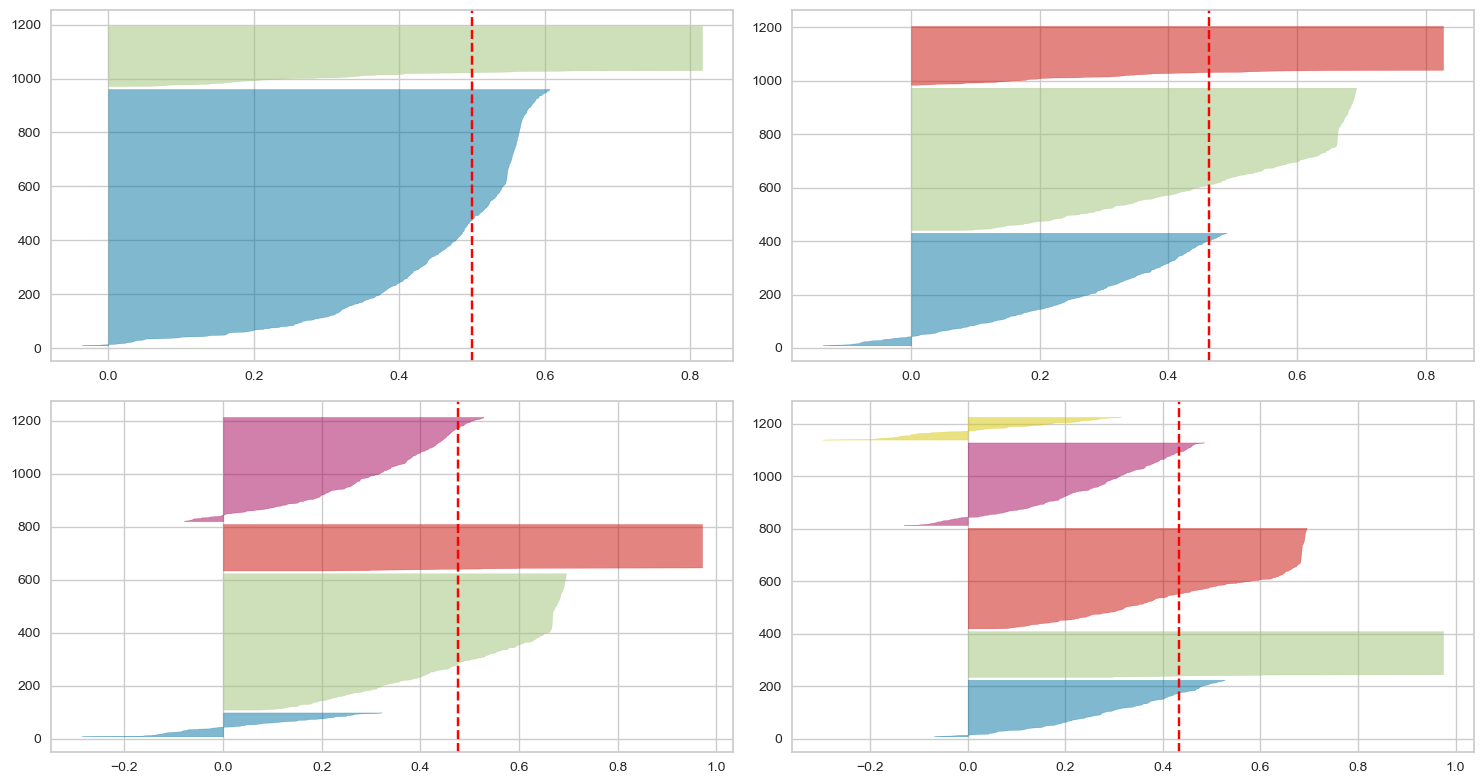

In [117]:

# Define the columns to keep
columns_to_keep = ['VCL', 'VAP', 'VSL', 'LIN', 'WOB', 'STR','ALH Mean', 'ALH Max']

# Select only the specified columns
features = combined_data[columns_to_keep].fillna(0)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)





fig, ax = plt.subplots(2, 2, figsize=(15,8)) # Adjust this line for a 2x2 grid
for i, n_clusters in enumerate([2, 3, 4, 5], start=1):
    # Note the change to the loop variable and the start parameter in enumerate
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    # Calculate the grid position for the current subplot
    row = (i-1) // 2
    col = (i-1) % 2

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(scaled_features)
    
    silhouette_avg = silhouette_score(scaled_features, km.labels_)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg:.3f}")
    
    # To access the value at the red dotted line, which is the average silhouette score,
    # we use the silhouette_score_ attribute from visualizer
    red_dotted_line_value = visualizer.silhouette_score_
    print(f"The value at the red dotted line for n_clusters = {n_clusters} is: {red_dotted_line_value:.3f}")

# Adjust layout
plt.tight_layout()
plt.show() # Make sure to call plt.show() to display the plots


1176


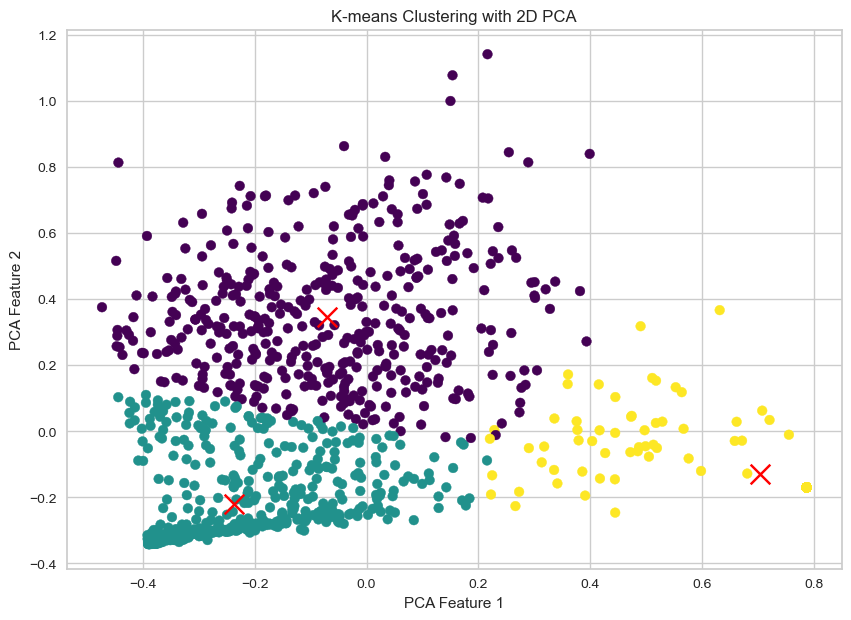

In [119]:
n_clusters = 3 # Just as an example, replace with the number you determined
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

# Assuming 'scaled_features' is an array-like object containing your scaled data
km.fit(scaled_features)
# Fit the model
km.fit(scaled_features)

# Predict the clusters
labels = km.predict(scaled_features)



pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
print(len(reduced_features))
# Predict cluster indices for each point in the reduced feature space
cluster_labels = km.predict(scaled_features)

# Plot the reduced data points with different colors for each cluster
plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')

# Plot the cluster centroids
centroids = pca.transform(km.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

# Set plot title and axis labels
plt.title('K-means Clustering with 2D PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Show plot
plt.show()

In [93]:
numeric_data = merged_kinematic_dataframes['21'].select_dtypes(include=[np.number]).drop(['frames_present_by_fid', 'total_distance', 'total_frames', 'class','total_displacement'], axis = 1)

# Group by 'Cluster' and calculate mean for numeric columns
cluster_means = numeric_data.groupby('Cluster').mean()

# Print the cluster means
cluster_means

,VSL,VCL,VAP,WOB,LIN,STR,ALH Mean,ALH Max
Cluster,,,,,,,,
0,7.242716,25.095778,19.689868,89.353661,62.376036,67.968459,0.138877,2.313817
1,100.037411,222.927829,133.957804,65.020021,48.649498,84.410225,2.687894,16.694980
2,95.505567,87.520192,1.107804,0.652751,58.270249,14.576875,1.975226,2.947847


In [95]:


# Directory to save the plots
directory = '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/'

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

plot_files = []
for column in numeric_data.columns.difference(['Cluster', 'fid']):  # Exclude 'Cluster' and 'fid' from the plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=kinematic_dataframes['21'])
    plt.title(f'Distribution of {column} by Cluster')
    
    plot_file_path = f'{directory}cluster_distribution_{column}.png'
    plt.savefig(plot_file_path)
    
    # Add the file path to the list for download
    plot_files.append(plot_file_path)

    # Close the plot to avoid display in the notebook
    plt.close()

plot_files



['/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_ALH Max.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_ALH Mean.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_LIN.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_STR.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VAP.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VCL.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VSL.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_WOB.png']

In [99]:


# Define the columns to keep
columns_to_keep = ['VCL', 'VAP', 'VSL', 'LIN', 'WOB', 'STR', 'ALH Mean', 'ALH Max']

# Initialize the scaler
scaler = MinMaxScaler()

# Initialize the PCA transformer
pca = PCA(n_components=2)  # You can adjust the number of components as needed

# Create an empty list to store data for all participants
all_pca_data = []

for participant_key, df in merged_kinematic_dataframes.items():
    # Select only the specified columns
    features = df[columns_to_keep].fillna(0)

    # Fit and transform the features
    scaled_features = scaler.fit_transform(features)

    # Apply PCA transformation
    pca_features = pca.fit_transform(scaled_features)

    # Create a DataFrame with PCA features and participant key
    pca_df = pd.DataFrame({'Participant': [participant_key] * len(pca_features), 'PCA1': pca_features[:, 0], 'PCA2': pca_features[:, 1]})

    all_pca_data.append(pca_df)

    
    a
# # Concatenate the PCA DataFrames for all participants
# # Concatenate the PCA DataFrames for all participants
# combined_pca_data = pd.concat(all_pca_data, ignore_index=True)

# # Assign names to the PCA components
# combined_pca_data.columns = ['Participant', 'PCA1', 'PCA2']

# # Create KMeans instance
# n_clusters = 3  # You can adjust the number of clusters as needed
# km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

# # Fit KMeans to the combined PCA features
# km.fit(combined_pca_data[['PCA1', 'PCA2']])

# # Calculate silhouette score for the entire dataset
# silhouette_avg = silhouette_score(combined_pca_data[['PCA1', 'PCA2']], km.labels_)
# print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.3f}")

# # Create SilhouetteVisualizer instance with KMeans instance
# visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

# # Fit the visualizer
# visualizer.fit(combined_pca_data[['PCA1', 'PCA2']])

# # To access the value at the red dotted line, which is the average silhouette score,
# # we use the silhouette_score_ attribute from visualizer
# red_dotted_line_value = visualizer.silhouette_score_
# print(f"The value at the red dotted line for n_clusters = {n_clusters} is: {red_dotted_line_value:.3f}")

# # Display the silhouette plot
# visualizer.poof()


[   Participant      PCA1      PCA2
 0           11 -0.745321 -0.190484
 1           11 -0.775006 -0.221480
 2           11 -0.681955 -0.110284
 3           11  0.315117  1.106306
 4           11  0.315117  1.106306
 5           11 -0.737431 -0.206706
 6           11  0.315117  1.106306
 7           11  0.217000  0.542581
 8           11 -0.701106 -0.186132
 9           11 -0.760464 -0.220936
 10          11 -0.732504 -0.215739
 11          11  0.551768 -0.117101
 12          11 -0.701324 -0.169099
 13          11 -0.538735  0.048182
 14          11  0.315117  1.106306
 15          11  1.371102 -0.787977
 16          11 -0.774090 -0.222232
 17          11 -0.774090 -0.222232
 18          11 -0.535582  0.054081
 19          11  1.057770 -0.556004
 20          11  0.315117  1.106306
 21          11 -0.776549 -0.220170
 22          11  0.413308  0.089519
 23          11 -0.711517 -0.181002
 24          11  0.459221 -0.554879
 25          11 -0.699501 -0.160693
 26          11 -0.775076 -0